## Observation on data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/covid-data/Covid.csv


In [2]:
df = pd.read_csv('/kaggle/input/covid-data/Covid.csv')

In [3]:
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [4]:
df.shape

(230, 13)

In [5]:
df.sample(5)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
193,194,Greenland,"11,971",21,NaN,"2,761","9,189",4,"210,117",369,"164,926","2,894,810","56,973"
67,68,UAE,"1,027,031","2,345",NaN,"1,006,369","18,317",NaN,"101,870",233,"190,586,733","18,904,066","10,081,785"
208,209,St. Vincent Grenadines,"7,112",115,NaN,"6,641",356,NaN,"63,756","1,031","100,856","904,125","111,551"
80,81,Kuwait,"658,520","2,563",NaN,"655,316",641,3,"150,336",585,"8,365,279","1,909,739","4,380,326"
201,202,Antigua and Barbuda,"9,098",146,NaN,"8,923",29,1,"91,429","1,467","18,901","189,943","99,509"


In [6]:
df.isnull().sum()

#                       0
Country,\nOther         0
Total\nCases            0
Total\nDeaths           5
New\nDeaths           227
Total\nRecovered       16
Active\nCases          15
Serious,\nCritical     83
Tot Cases/\n1M pop      2
Deaths/\n1M pop         7
Total\nTests           16
Tests/\n1M pop         16
Population              2
dtype: int64

## Drop unnecessary col

 total 230 rows and in col 'New\nDeaths' 227 are missing val. drop this col.

In [7]:
df = df.drop(['New\nDeaths','Country,\nOther','Tot Cases/\n1M pop','Deaths/\n1M pop', 'Tests/\n1M pop',], axis=1)


In [8]:
df.shape

(230, 8)

## Rename Columns

In [9]:
df.columns

Index(['#', 'Total\nCases', 'Total\nDeaths', 'Total\nRecovered',
       'Active\nCases', 'Serious,\nCritical', 'Total\nTests', 'Population'],
      dtype='object')

In [10]:
df.rename(columns={ 'Total\nCases': 'TotalCases',
                    'Total\nDeaths': 'TotalDeaths', 'Total\nRecovered': 'TotalRecovered',
                    'Active\nCases': 'ActiveCases', 'Serious,\nCritical': 'SeriousCritical',
                    'Tot Cases/\n1M pop': 'TotCases/pop', 'Deaths/\n1M pop': 'Deaths/pop',
                    'Total\nTests': 'TotalTests', 'Tests/\n1M pop': 'Tests/pop',
                  }, inplace=True)

In [11]:
df.head(5)

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalTests,Population
0,1,"98,166,904","1,084,282","94,962,112","2,120,510","2,970","1,118,158,870","334,805,269"
1,2,"44,587,307","528,629","44,019,095","39,583",698,"894,416,853","1,406,631,776"
2,3,"35,342,950","155,078","34,527,115","660,757",869,"271,490,188","65,584,518"
3,4,"34,706,757","686,027","33,838,636","182,094","8,318","63,776,166","215,353,593"
4,5,"33,312,373","149,948","32,315,200","847,225","1,406","122,332,384","83,883,596"


In [12]:
df.isnull().sum()

#                   0
TotalCases          0
TotalDeaths         5
TotalRecovered     16
ActiveCases        15
SeriousCritical    83
TotalTests         16
Population          2
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #                230 non-null    int64 
 1   TotalCases       230 non-null    object
 2   TotalDeaths      225 non-null    object
 3   TotalRecovered   214 non-null    object
 4   ActiveCases      215 non-null    object
 5   SeriousCritical  147 non-null    object
 6   TotalTests       214 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.5+ KB


## Modify datatype

In [14]:
df.columns

Index(['#', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'SeriousCritical', 'TotalTests', 'Population'],
      dtype='object')

In [15]:
columns_to_convert = [ 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'SeriousCritical', 'TotalTests', 'Population']

# Remove commas and convert to integers
for column in columns_to_convert:
    # Ensure the column is treated as string before replacing commas and converting
    df[column] = pd.to_numeric(df[column].astype(str).str.replace(',', ''), errors='coerce').astype('Float64')


In [16]:
#columns_to_convert = df.columns.difference(['#', 'Country'])
#df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                230 non-null    int64  
 1   TotalCases       230 non-null    Float64
 2   TotalDeaths      225 non-null    Float64
 3   TotalRecovered   214 non-null    Float64
 4   ActiveCases      215 non-null    Float64
 5   SeriousCritical  147 non-null    Float64
 6   TotalTests       214 non-null    Float64
 7   Population       228 non-null    Float64
dtypes: Float64(7), int64(1)
memory usage: 16.1 KB


In [18]:
df.sample(5)

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalTests,Population
186,187,15747.0,74.0,15651.0,22.0,<NA>,228799.0,72344.0
163,164,34658.0,28.0,<NA>,<NA>,5.0,778000.0,49233.0
220,221,1396.0,8.0,1353.0,35.0,<NA>,17579.0,4965.0
215,216,4611.0,1.0,4605.0,5.0,<NA>,20509.0,10903.0
90,91,493563.0,7572.0,471918.0,14073.0,1.0,5258807.0,120812698.0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

## Handling outliers

## TotalCases

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


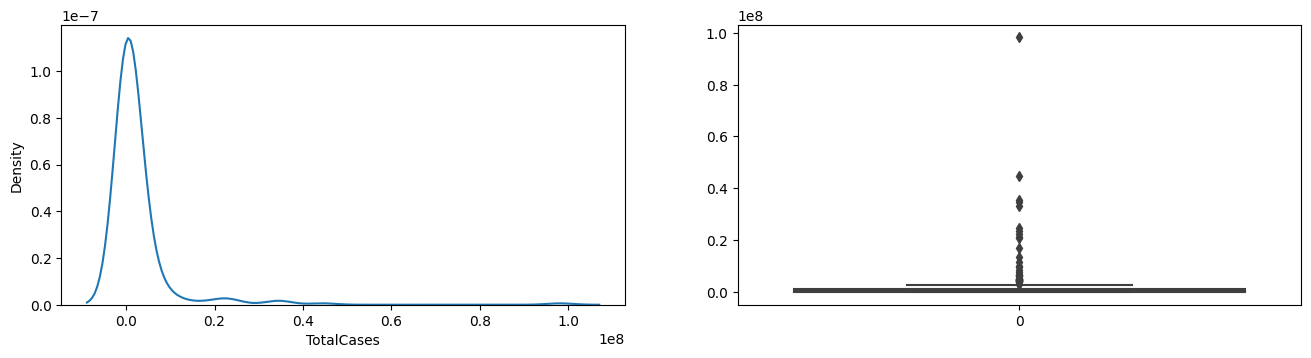

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['TotalCases'])
plt.subplot(2,2,2)
sns.boxplot(df['TotalCases'])

plt.show()

## Finding the IQR for TotalCases

In [21]:
percentile25 = df['TotalCases'].quantile(0.25)
percentile75 = df['TotalCases'].quantile(0.75)
print("percentile75:",percentile75)
iqr = percentile75 - percentile25
print("iqr:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

percentile75: 1256286.0
iqr: 1232637.0
Upper limit: 3105241.5
Lower limit: -1825306.5


### find outliers

In [22]:
df[df['TotalCases'] > upper_limit]

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalTests,Population
0,1,98166904.0,1084282.0,94962112.0,2120510.0,2970.0,1118158870.0,334805269.0
1,2,44587307.0,528629.0,44019095.0,39583.0,698.0,894416853.0,1406631776.0
2,3,35342950.0,155078.0,34527115.0,660757.0,869.0,271490188.0,65584518.0
3,4,34706757.0,686027.0,33838636.0,182094.0,8318.0,63776166.0,215353593.0
4,5,33312373.0,149948.0,32315200.0,847225.0,1406.0,122332384.0,83883596.0
5,6,24769101.0,28406.0,24013461.0,727234.0,352.0,15804065.0,51329899.0
6,7,23621952.0,189919.0,23347871.0,84162.0,146.0,522526476.0,68497907.0
7,8,22432803.0,177054.0,21779604.0,476145.0,141.0,246636495.0,60262770.0
8,9,21229216.0,44678.0,20380089.0,804449.0,204.0,76201407.0,125584838.0
9,10,20948470.0,387163.0,19979763.0,581544.0,2300.0,273400000.0,145805947.0


In [23]:
df[df['TotalCases'] < lower_limit]

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalTests,Population


## Cappingg to TotalCases

In [24]:
new_df_cap = df.copy()

new_df_cap['TotalCases'] = np.where(
    new_df_cap['TotalCases'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['TotalCases'] < lower_limit,
        lower_limit,
        new_df_cap['TotalCases']
    )
)

In [25]:
new_df_cap.shape

(230, 8)

## Comparing before and after capping

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


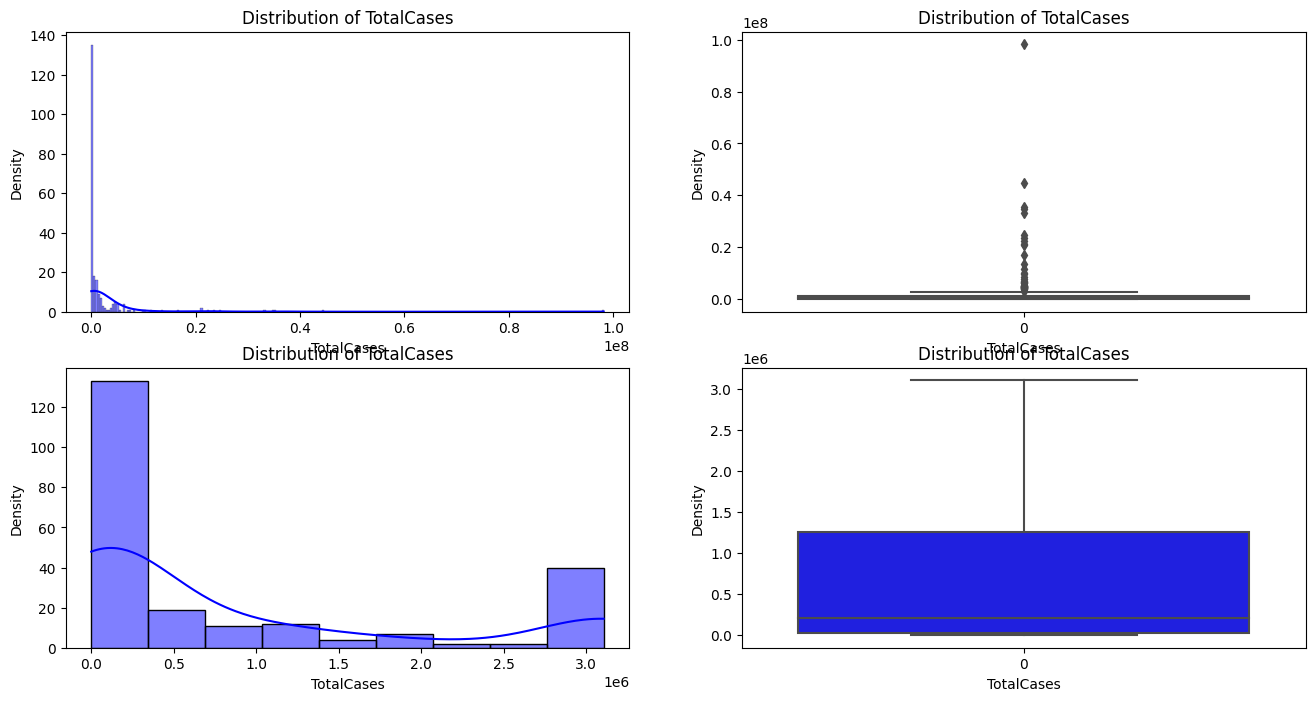

In [26]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df['TotalCases'], kde=True, color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


#plt.subplot(2,2,1)
#sns.distplot(df['TotalCases'])

plt.subplot(2,2,2)
sns.boxplot(df['TotalCases'], color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


plt.subplot(2,2,3)
sns.histplot(new_df_cap['TotalCases'], kde=True, color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['TotalCases'], color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


plt.show()

In [27]:
df= new_df_cap

## TotalDeaths

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


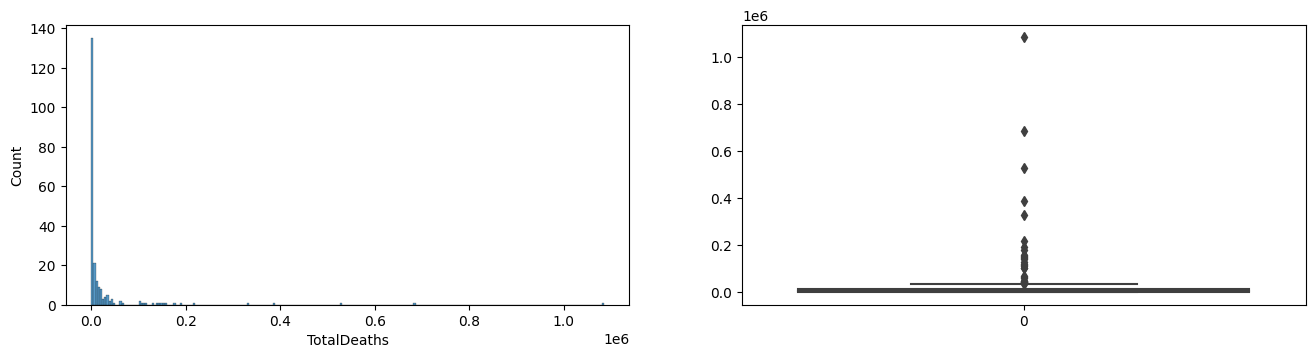

In [28]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,3)
sns.histplot(df['TotalDeaths'])
plt.subplot(2,2,4)
sns.boxplot(df['TotalDeaths'])


plt.show()

## Finding the IQR for TotalDeath

In [29]:
percentile25 = df['TotalDeaths'].quantile(0.25)
percentile75 = df['TotalDeaths'].quantile(0.75)
print("percentile75:",percentile75)
iqr = percentile75 - percentile25
print("iqr:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

percentile75: 14122.0
iqr: 13920.0
Upper limit: 35002.0
Lower limit: -20678.0


## Cappingg to TotalDeath

In [30]:
new_df_cap = df.copy()
new_df_cap.fillna({'TotalDeaths': -9999}, inplace=True) 
new_df_cap['TotalDeaths'] = np.where(
    new_df_cap['TotalDeaths'] > upper_limit,  
    upper_limit,  
    np.where(
        new_df_cap['TotalDeaths'] < lower_limit,  
        lower_limit,  
        new_df_cap['TotalDeaths']  
    )
)

## Comparing before and after capping

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


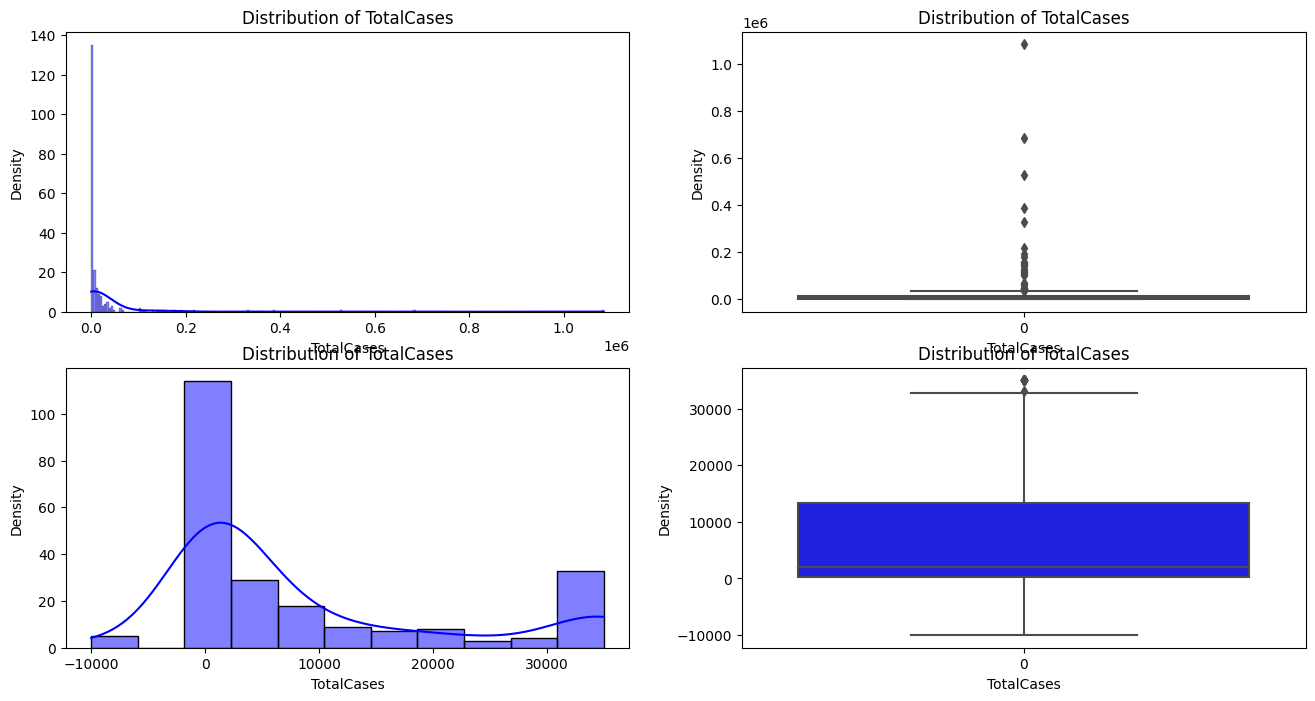

In [31]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df['TotalDeaths'], kde=True, color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


#plt.subplot(2,2,1)
#sns.distplot(df['TotalCases'])

plt.subplot(2,2,2)
sns.boxplot(df['TotalDeaths'], color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


plt.subplot(2,2,3)
sns.histplot(new_df_cap['TotalDeaths'], kde=True, color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['TotalDeaths'], color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


plt.show()